<a href="https://colab.research.google.com/github/majorquev/DBDC_202409_Programacion_en_R_para_ciencia_de_datos/blob/main/Clases/C8/1_Distribuciones_de_probabilidad_en_r.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Parte 6: Distribuciones de probabilidad

**Autor:** Miguel Jorquera Viguera.<br>
**E-mail:** majorquev@gmail.com<br>
**Ayudante:** Rodrigo Morales<br>
**E-mail ayudante:** rumorale1@gmail.com

En R podemos obtener valores tanto de las funciones de densidad, distribución de probabilidad, cuantiles de una distribución o bien generar valores aleatorios de diversas distribuciones paramétricas.
Casi todas las distribuciones que se encuentran implementadas en la librería base de R se referencian de la misma manera.

* Funciones de densidad (PDFs) comienzan con la letra “d.”
* Funciones de distribución acumulada comienzan con la letra “p.”
* Funcioenes que retornan quantiles de una distribución comienzan con la letra “q.”
* Funciones que generan valores aleatorios comienzan con la letra“r.”

Por defecto, en R contamos con una amplia variedad familias de distribuciones enre las que destacan las siguientes.



**Distribution**| **R name**| **additional arguments**
-----| -----| -----
beta |`beta` |shape1, shape2, ncp
binomial| `binom`| size, prob
Cauchy|`cauchy` |location, scale
chi-squared| `chisq`| df, ncp
exponential| `exp` |rate
F| `f` |df1, df2, ncp
gamma |`gamma` |shape, scale
geometric |`geom` |prob
hypergeometric| `hyper`| m, n, k
log-normal| `lnorm` |meanlog, sdlog
logistic |`logis` |location, scale
negative| `binomial`| nbinom size, prob
normal |`norm` |mean, sd
Poisson| `pois`| lambda
signed rank |`signrank`| n
Student’s t| `t`| df, ncp
uniform |`unif`| min, max
Weibull| `weibull`| shape, scale
Wilcoxon |`wilcox`|m, n




# I) Distribución normal

## Función de densidad
$$f(x) = \frac{1}{\sqrt{2 π \sigma^2}} e^{-\frac{1}{2\sigma^2}(x - \mu)^2}$$

## En R...

* `dnorm(x, mean = 0, sd = 1, log = FALSE)`: Evalúa la función de densidad.
* `pnorm(q, mean = 0, sd = 1, lower.tail = TRUE, log.p = FALSE)`: Calcula la probabilidad acumulada (función de distribución).
* `qnorm(p, mean = 0, sd = 1, lower.tail = TRUE, log.p = FALSE)`: Calcula los quantiles de la distribución. (Función inversa de la función de distribución de probabilidad).
* `rnorm(n, mean = 0, sd = 1)`: Genera muestras aleatroias.




**P1.** Se sabe que la estatura de la población adulta de sexo masculino chilena sigue una distribución normal con media 171,8 cms y una desviación estándar de 5cms

**a)** ¿Cuál es la probabilidad de encontrar de que una persona hombre  adulta tenga una estatura
menor o igual a 160 cms?

In [1]:
# pnorm()
pnorm(160, mean = 171.8, sd = 5) # Hay una prob de un 0.9% de encontrar una persona Chilena ..... que mida 1.60 mts o menos.




[1] 0.009137468

In [ ]:
?pnorm

  
**b)** ¿Cuál es la probabilidad de encontrar de que una persona adulta tenga una estatura mayor  a 160 cms?
  

In [4]:
#P(estatura > 160) = 1- P(estatura <= 160)
1-pnorm(160, mean = 171.8, sd = 5) # 99% de prob de que un adulto Chileno mida más de 1.60.

#NOTA
# lower.tail
pnorm(160, mean = 171.8, sd = 5, lower.tail = F )

[1] 0.9908625

[1] 0.9908625

**c)** ¿Cuál es la probabilidad de encontrar una persona con estatura entre 180cms y 190 cms?

In [5]:
pnorm(190, mean = 171.8, sd = 5) - pnorm(180, mean = 171.8, sd = 5)
# Hay un 5% de prob de encontrar una persona con estatura entre 1.8 y 1.9 mts.

[1] 0.05036626

**d)** ¿Cuál es la estatura que corresponde al percentil 90?

In [7]:
# Cual es la estatura que acumula el 90% de probabilidad
# dnorm evalua la funcion de densidad/masa?
# pnorm evalua la funcion de distribucion acumulada?
# qnorm retorna cuantiles?
# rnorm genera muestras aleatorias?

qnorm(0.9, mean = 171.8, sd = 5)
# El percentil 90 corresponde a 178.2 cms
# NOTA para recordar que estamos calculando.
qnorm(0.5, mean = 171.8, sd = 5)



[1] 178.2078

[1] 171.8

**d)**  Genere una muestra aleatoria de tamaño 1000 y guárdela en un vector llamado _estaturas_, provenientes de una distribución normal con media 171,8 y desviación estandar igual a 5.

In [18]:
# estaturas
set.seed(2020) #semilla (Opcional e inncesario)
estaturas <- rnorm(1000, mean = 171.8, sd = 5)


In [17]:
head(estaturas, 10)

[1] 166.4676 171.0944 173.2536 176.5939 172.4598 163.9609 169.7099 174.2764
 [9] 174.8114 172.7445

In [19]:
summary(estaturas)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  156.0   168.2   171.5   171.7   175.0   190.3 

In [20]:
sd(estaturas)

[1] 5.184827

**e)** Mediante la función _hist()_ y la función _curve()_  genere un histograma de la muestra creada y añada la curva de distribución normal con la media y desviación estandar reales.

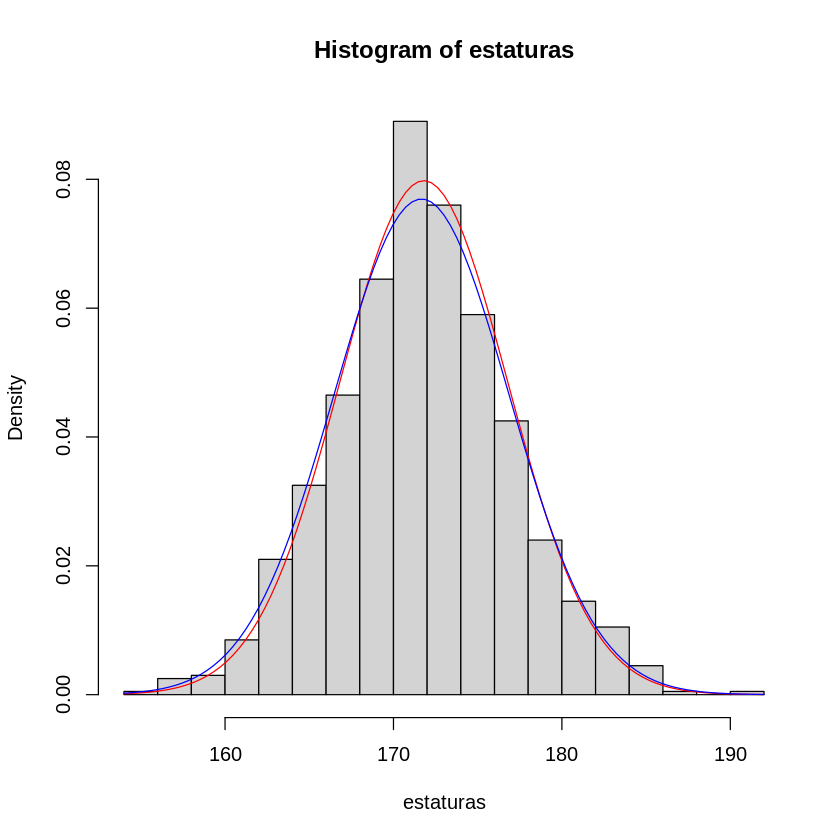

In [24]:
## NOTA
hist(estaturas, freq = F, breaks = 20 )
curve(dnorm(x,mean = 171.8, sd = 5 ), add = T, col = "red") # Rojo la densidad normal con los parametros reales
curve(dnorm(x,mean = mean(estaturas), sd = sd(estaturas)), add = T, col = "blue") # Azul la densidad normal con los parametros estimados

In [26]:
library(ggplot2)
library(dplyr)

In [27]:
# Notar que en un histograma podemos visualizar los conteos o las frecuencias relativas.
df <- data.frame(est = estaturas)
head(df)


,est
,<dbl>
1,173.6849
2,173.3077
3,166.3099
4,166.1480
5,157.8173
6,175.4029


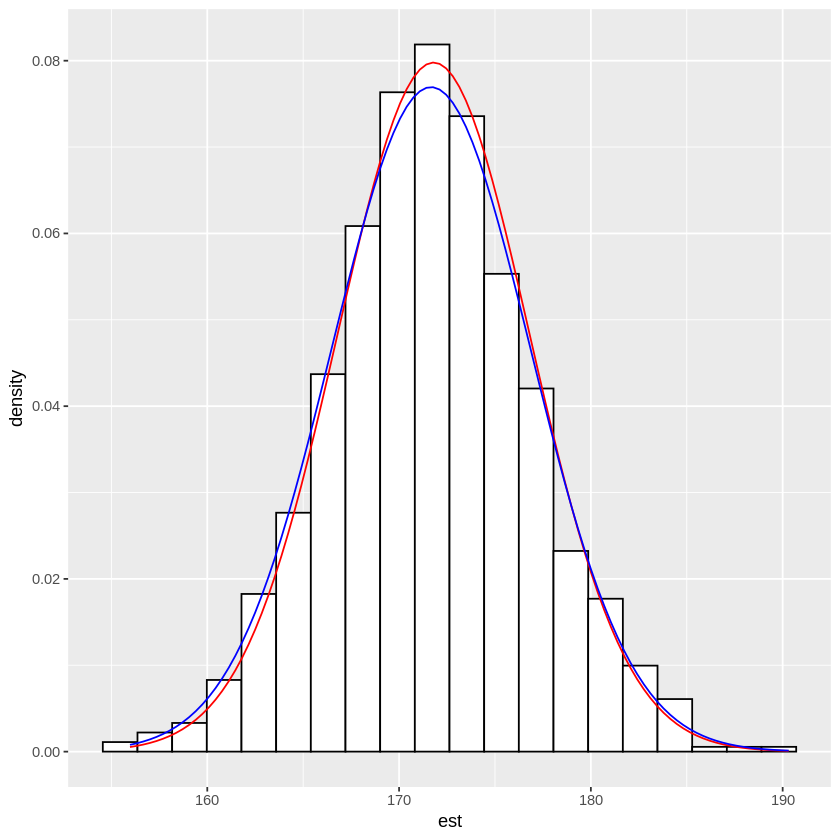

In [32]:
df %>%
  ggplot() +
  aes(x = est) +
  geom_histogram(
    bins = 20,
    fill = "white",
    color = "black",
    mapping = aes(y = after_stat(density))
  ) +
  stat_function(
    fun = dnorm,
    args = list(mean = 171.8, sd = 5),
    col = "red" # la densidad normal con los parametros reales
  ) +
  stat_function(
    fun = dnorm,
    args = list(mean = mean(df$est), sd = sd(df$est)),
    col = "blue" # la densidad normal con los parametros reales
  )

## Recordatorio (definición de funciones)

```
function(par1, par2, ...){
    ...
    return(...)
}
```

In [33]:
suma <- function(a,b){
  aux <- a+b
  return(aux)
}

In [34]:
suma(8,10)

[1] 18

# NOTA

En R tambien podemos visualizar estimaciones de densidades sin un supuesto distribucional previo.

Por ejemplo, una manera de estimar la densidad de una variable de forma no paramétrica, es a través destimación vía Kernels (solo para dar la referencia).

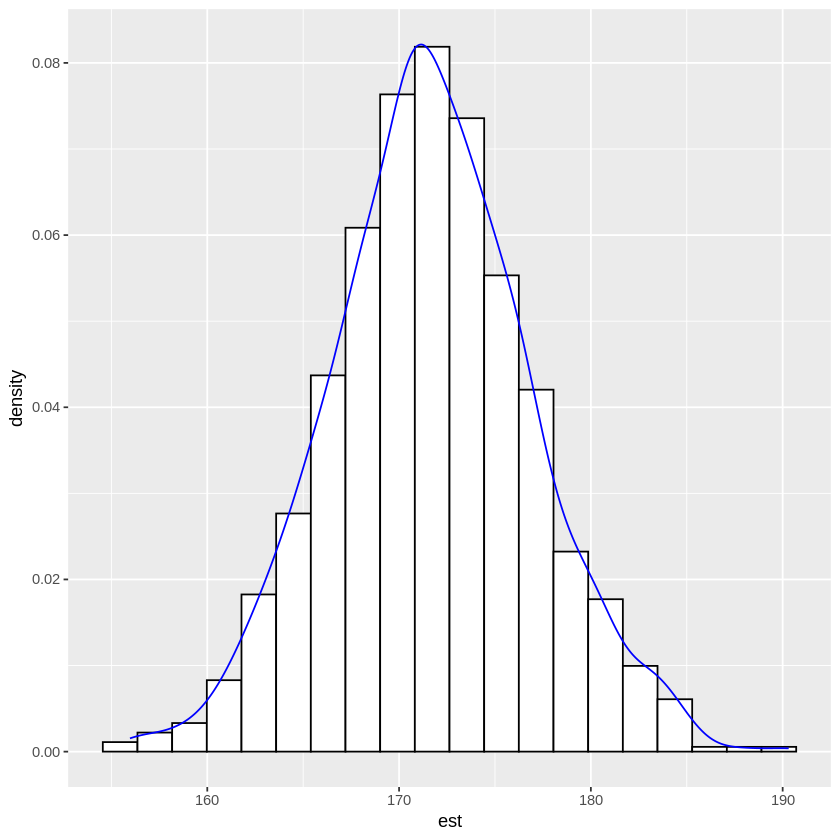

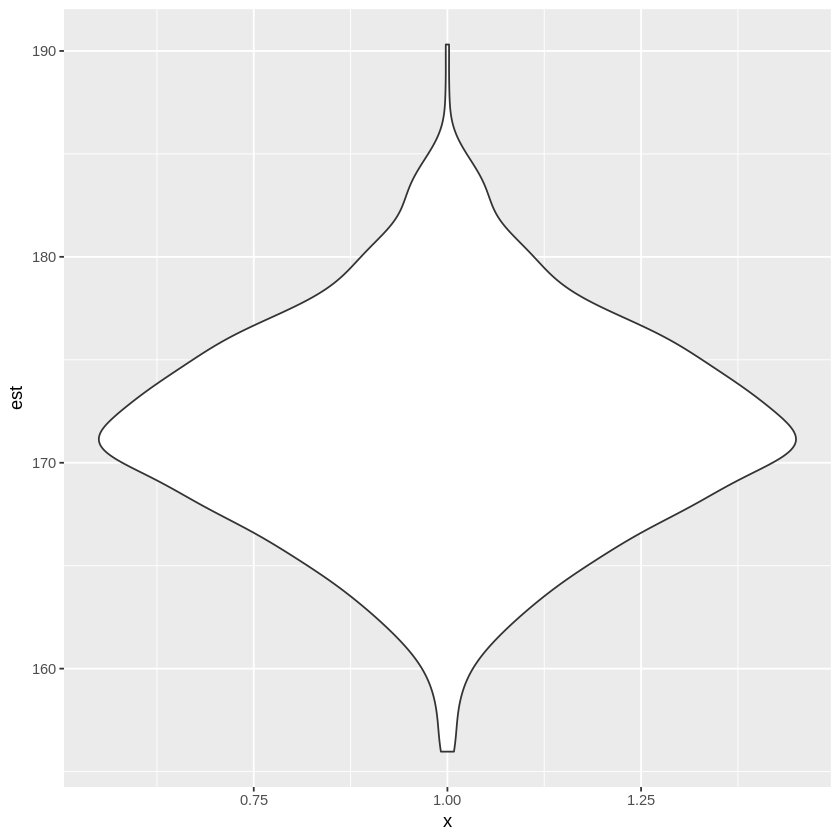

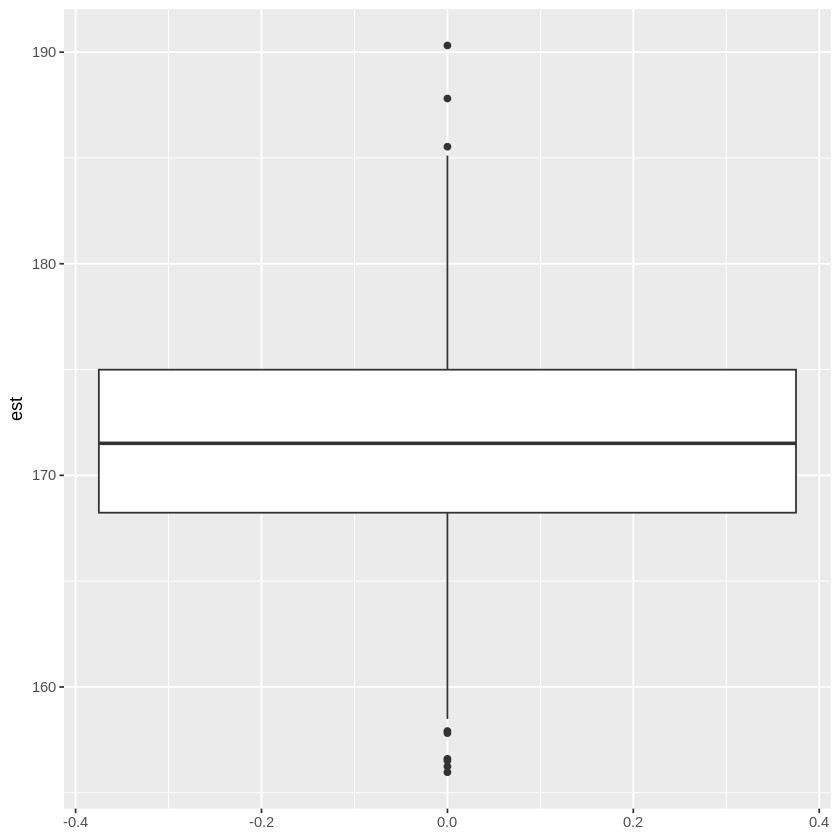

In [41]:
df %>%
  ggplot() +
  aes(x = est) +
  geom_histogram(
    bins = 20,
    fill = "white",
    color = "black",
    mapping = aes(y = after_stat(density))
  ) +
    geom_density(col = "blue")


  df %>%
  ggplot() +
  aes(x = 1, y = est) +
  geom_violin()

 df %>%
  ggplot() +
  aes( y = est) +
  geom_boxplot()

# II)Distribucion binomial
## Contexto
Cuando una variable aleatoria representa la cantidad de éxitos en $n$ ensayos independientes de tipo Bernoulli (0 o 1), se dice que dicha variable sigue una distribución binomial.

## Función de probabilidad


$$p(x) = {n\choose x}p^x(1-p)^{n-x}$$
Donde $n$ es el total de ensayos realizados y $x$ es la cantidad de éxitos observados y $p$ es la probabilidad de éxito del evento de interés.

## En R...

* `dbinom(x, size, prob, log = FALSE)`: Evalúa la función de masa. En el caso discreto corresponde a la probabilidad del evento.
* `pbinom(q, size, prob, lower.tail = TRUE, log.p = FALSE)`: Calcula la probabilidad acumulada.
* `qbinom(p, size, prob, lower.tail = TRUE, log.p = FALSE)`: Retorna cuantiles de la distribución.
* `rbinom(n, size, prob)`: Genera muestras aleatorias.

**P2.** Suponga que un spot publicitario de un artículo tiene una tasa de efectividad de 20% sobre una determinada población.

**a)** Suponga que se logra llegar con el spot a 100 personas. ¿Cuál es la probabilidad de que
 al menos 30  personas compren el artículo ofrecido?

In [42]:
# Identifiquemos algunos elementos como
# Experimento : Hacer llegar el spot a las 100 personas y registrar el número de clientes que efectivamente compraron el artículo.
# Variable aleatoria : X: "el número de clientes (de los 100) que compraron el artículo"
# Espacio muestral : {0,1,2,...,100}
#-------parámetros de pbinom ---------
#size (n): 100
#prob (p): 0.2


#P(X >= 30) = 1 - P(X < 30) = 1-P(X <= 29)

1-pbinom(29, size = 100, prob = 0.2) # 1.1% de prob de que 30  o más personas compren .




[1] 0.01124898

In [47]:
# ¿Cuál es la probabilidad de que exactamente 30 personas compren el artículo ofrecido?
dbinom(30, size = 100, prob = 0.2)# 0.5% de prob de que 30 compren.

# choose(100,30)*0.2^30*(1-0.2)^(100-30)



[1] 0.005189643

[1] 0.005189643

In [48]:
# usando pbinom (calculando robs acumuladas), podemos calcular lo anterior?
pbinom(30, size = 100, prob = 0.2) - pbinom(29, size = 100, prob = 0.2)

[1] 0.005189643

**P3.** En una localidad se sabe que el 70% de las casas tienen un televisor.  Se quiere realizar una encuesta a 8 casas ¿cuál es la probabilidad de que 6 o más de ellas tengan televisor?

In [49]:
# size = 8
# prob = 0.7
# P(X >= 6) = 1-P(X < 6) = 1-P( X <= 5)

1-pbinom(5 ,size = 8, prob = 0.7)# Hay un 55% de prob de que 6 o más casas tengan TV.

[1] 0.5517738

## Lanzando una moneda
**P4** Supongamos que una **honesta** se lanza 14 veces y se anota el número veces que se obtuvo cara.

**a)** ¿Cuál es la probabilidad de obtener exactamente 4 caras? ¿y al menos 10?

In [ ]:
#size = n = 14, y prob = p = 0.5 ?



In [ ]:
# P(X >= 10)


  
**b)** Si se repite el experimento 5000 veces.


*   ¿Qué proporción de caras se debería esperar?¿y si se repite más veces?
*   ¿En qué % de casos se obtuvo exactamente 4 caras? ¿ y si se repite más veces?


 Utillice la función rbinom para simular el experimento 100 veces.

In [56]:
# simulamos un experimento binomial
set.seed(2024)
N <- 5000

lanzamientos <- rbinom(n = N, size = 14, prob = 0.5)




In [51]:
lanzamientos

[1]  9  6  8  8  7  8  7  6  9  5  9 10  8  7  7  9  5  9  5  6  4  5  8  9
  [25]  9  6  8  9  1  3  7  6  5 11  8  8  4 10  3  8  9 10  8  6  9  7  7  6
  [49]  8  8  4  8  7  7  8  8  3  5  7  6  4  7  6  8  6  9  9  8  6  6  8  5
  [73]  8  7  6  8  6  4  8  6  5  6  7  3  8  7 11  6  5  9  7  9  8  4  8  5
  [97]  8  7 11  7  6  8  6  7  6  9  5  4  6  9  4  8  9  4  7  9  9  5  7  6
 [121] 10  4  9  5  8  3  7  9 10 12  7  3  3  7  8  8  8  5  3  7  9  6  5  7
 [145]  8 12  7  6  7  6  6  7 10  5  8  7  5  3  7  5  5  8  9  5  9  9  4  8
 [169]  7  6  9  8  7  9  7  8  7  3  9  7  5 10  6  8  6 12  8  8  8  5  3  3
 [193]  5  4  5  4  7  7  9 10 11  4  8  5  9  4  7  7  5  9  8  9  7  7  9  7
 [217]  6  9  5  5  5  7  9  7  6  9  7 10  6  7  4  5 11  6  8 10  7  5  9 10
 [241]  7  4  6  7  5  5  7  9  6  9  7  5  5  7  5  7  6  6  8  2  5  4  7  8
 [265]  6  7  7  5 10 11  5  4  5  4  8  7  8  5  6 11  8  7  5  7  6  6 10 11
 [289]  9  4  8  9 10  8  7  6  9  8  9  5  5  8  7  8 11  5  9  7  6  9  2  6
 [313]  8  6  6  4  6 11  8  4 10  8  7 10  7  6 10 10  6  5  6 11  7  8  4  7
 [337]  9  9 11 10  6  7  9 10  6  7  7  6  8  7  9  7  9  8  7  6  8  9  6  8
 [361]  8  4  7  8  8  9  6  7  6  8  8 10  9  3  6  8  6  4  8  5  6  6  5  8
 [385]  8  7  9  8  9  6  8  5  9  5  8  9 11  9  4  8  7  9  8 11  6  4  7  7
 [409]  9  8  5  7  6  7  7  9  9  7  8  4  6 11  8  9  6 11  2  6  8 11  8  6
 [433]  8  8  8 10  6 10  9  7  6  7 10  6  7  9  7  7  7  5  7  8  7  6  8  7
 [457]  7  8  8  9 10  6  8  6  7  6  6  8  7  3  7  4  7  6  6  6  7  8  5  9
 [481]  7  8  9  6 10  5  9  7  5  7 10 10  6  9  7  9  5  9  7  9 10  7  7  6
 [505]  9  4  6  7  8  9  4  4  7  9  7  5  8  7  5 10  7  9  6 10  8  8  6  7
 [529]  2  6  8  9  6  8  8  4  8  6  9  7  9  7  7  8  5  8  5  5  8  8  7  7
 [553]  6  9  4  7  5  8  7  9  8  7  7  8 10  4  7  5  8  9  6  7  6  3  7  6
 [577]  9  5 12  9  6  3  9  6 10  8  6  7  8  8  8  2  9  9  5 10  5  8  7  8
 [601]  8  9  6  8  6  8  9  6 10  9  8  8  7  7  8 11  7  6  9  8  8  7  5  4
 [625]  4  9  5  8 12  7  6 10  7  6  7  9  9  7  6  6  5  5  7  7  8  5  6  8
 [649] 12  7  7  4  5  7  8  9  3  8  6  8  7  8  6  7  9  4  6  7  9  5  4  8
 [673] 10  7  3  6  7  7  8  9  6  8  4  7  8  7  7  6  8  4 10  6  5  7  8  5
 [697]  5 10  9  4  6  7  8  5  8  4  6  6  3  6  6  9  8  7  9  5  9  6  5  8
 [721]  7  6  8 11  6  5  6  8  8  8  6  5  7  9  7  4  8  7  6  5 10  5  6  7
 [745]  6  8  7  7  7  8  7  7  7  4  6  7 11  4  5  8  7  8  7  7  7 11  7  7
 [769] 10  7  8  4  4  3  9  7  7  7  9 10  7 10  8  5  9  6  5  8 10  5  8  7
 [793]  6  6  7  8  4  6  7  5 11  5  8  6  7  7  5  7  9  5  3  6  7  7  7  7
 [817]  8  7  8  6 10  7  7  6  9  6  8  5  8  5  7  7  5  6  5  6  4  7  8  7
 [841]  4  6 10  9  7  8  6  6  9  8  6  5 10  6  4  8  9  7 10  9 11  9 10  6
 [865]  9  8  5  7  9  7  9 10  4  6  5  8  6  6  7  8  6  9 10  7  7  7  6  8
 [889]  8  7  6  7  5  9  6  6  7  7  6  7  5  7  9  7  5  8  3  7  8  8  9  3
 [913]  8  6  8  7  5  4  9  3  8  9  8  5  8  7  9  9  4  7  7  3  7  8  9  5
 [937] 10  6  6  7  8  5  7  6  6  6  7  6  7  6  7  7  7  3  6  7  6  6  8  7
 [961]  8 11  6  9  6  7  8  8  5  4  8 11  7  9  7  8  6  6  9 10  7  9  7  8
 [985]  8  7  7  4  5  8  7  8  6  8  9  7  4  8  8  8  8  6  6  8  8  6  7  8
[1009] 11  6  5  7  3  6 10  8  7  8  5  8  7  6  8  6  5  6  9  8  6  5  5  7
[1033]  6  7  6  7  7  5  3  5  5  9  6  6  6  7  3  9  6  9 10  9  5  9  8  5
[1057]  8  8  8  8  5  8  5  5  7  8  8  5  7 10 11  9  7  6  5  9  4  5  7  9
[1081]  5  9  6  7  8  8  5 10  6  7 10  8  8  8  6  5  6  4  7  7  8 10  8  7
[1105]  8  3  7  8  7  6  7  5  4  5 10  6  6  7  8  7 10  7 11  6  6  9  7  7
[1129]  4  5  7 10  7  4  8  9  7  5  4  8  5  8  5 10  9  8  4  8  9 10 10  6
[1153]  6 11  7  8  9  6  4  7  5  7  9  7  4 10  5  8  8  7  7  9  7  7  5  8
[1177] 10  6 10  8  7  8  5  6  4  6  8  7  6  3  6  6  6  6 10  4  8  7  6  7
[1201]  2  4  9  8  8  9  7  8  7 10  5  9  7  7  3  

In [57]:
mean(lanzamientos) # Promedio de caras obtenidas por realización del exp
# Respecto de los 14 intentos por por realización del exp
mean(lanzamientos)/14

[1] 7.0124

[1] 0.5008857

In [ ]:
# Pero si queremos visualizar las frecuencias relativas observadas?
# Adicionalmente nos interesaría poder visualizar la función de masa de probabilidad.


In [58]:
df_aux <- data.frame(caras = lanzamientos)
df_aux2 <- df_aux %>%
  count(caras)

df_aux2

caras,n
<int>,<int>
1,2
2,25
3,110
4,279
5,611
6,919
7,1096
8,912
9,604


In [59]:

df_aux2 <- data.frame(caras = c(0,13,14), n = c(0,0,0) ) %>%
    bind_rows(df_aux2) %>%
    arrange(caras)

df_aux2

caras,n
<dbl>,<dbl>
0,0
1,2
2,25
3,110
4,279
5,611
6,919
7,1096
8,912


In [60]:
df_aux3 <- df_aux2 %>%
    mutate(freq_rel_obs = n/N,
           dens_teorica = round(dbinom(caras, size = 14, prob = 0.5),6 ), # curva roja
           dens_obs = round(dbinom(caras, size = 14, prob = mean(lanzamientos/14)),6 ) #curva azul
         )

In [61]:
df_aux3

caras,n,freq_rel_obs,dens_teorica,dens_obs
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,0,0.0000,0.000061,0.000060
1,2,0.0004,0.000854,0.000837
2,25,0.0050,0.005554,0.005457
3,110,0.0220,0.022217,0.021904
4,279,0.0558,0.061096,0.060449
5,611,0.1222,0.122192,0.121327
6,919,0.1838,0.183289,0.182636
7,1096,0.2192,0.209473,0.209468
8,912,0.1824,0.183289,0.183935


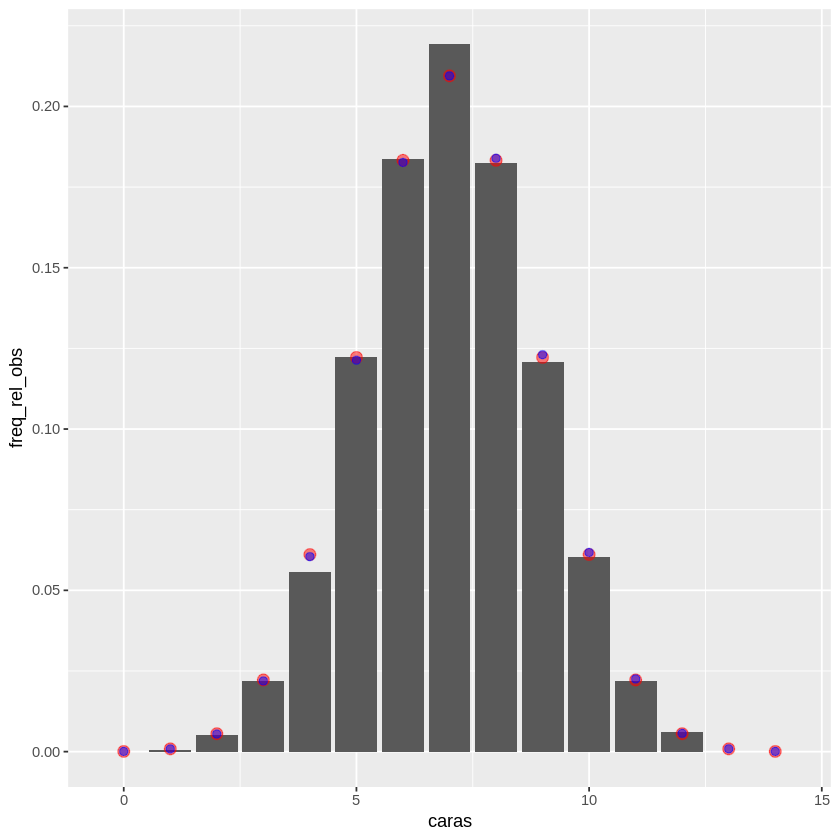

In [63]:

df_aux3 %>%
  ggplot() +
  aes(x = caras, y = freq_rel_obs) +
  geom_bar(stat = "identity") +
  geom_point(mapping = aes(y = dens_teorica), color = "red", size = 3,alpha = 0.5) +
    geom_point(mapping = aes(y = dens_obs), color = "blue", size = 2, alpha = 0.5)

# III) Distribución poisson
## Contexto
Usualmente una variable aleatoria poisson, representa la cantidad de eventos registrados en un interval fijo de tiempo con una cierta tasa de ocurrencia.
## Función de probabilidad

$$p(x) = \lambda^x \dfrac{e^{-\lambda}}{x!}$$

Donde $\lambda$ corresponde a la tasa de ocurrencia y $x$ la cantida de eventos observados.

## Funciones en R
 * `dpois(x, lambda, log = FALSE)`
 * `ppois(q, lambda, lower.tail = TRUE, log.p = FALSE)`
 * `qpois(p, lambda, lower.tail = TRUE, log.p = FALSE)`
 * `rpois(n, lambda)`

** P5. ** Suponga que en un restaurant de comida se tiene una tasa de llegada de clientes de 2 clientes por cada 3 minutos en promedio.
¿Cuál es la probabilidad de que 5 o más clientes lleguen en un período de 9 minutos?.


In [ ]:
# La tasa de éxito en una dist. poisson es el parámetro lambda
# Dada la info, se tiene una tasa de 6 clientes cada 9 minutos






**P6.** Se sabe que la tasa de falla en la elaboración de ampolletas sigue una distribución poisson, con una tasa de falla de 3 ampolletas defectuosas por semana.
¿Cuál es la probabilidad de que al cabo de un mes se genere un total de 20 ampolletas defectuosas o más?



In [ ]:
# lambda = 3*4 = 12 ampolletas defectuosas por mes

